# PROJECT - 1

# Ticket Price Prediction                                                            

## General steps to be Followed in this project are:
### 1. Business Problem
### 2. Data Collection and Importing Data
### 3. Data Cleaning and processing
### 4. Exploring the Data
### 5. EDA
### 6. Feature Engineering 
### 7. ML
### 8. Conclusion

In [15]:
# importing lybraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# import CSV file
data = pd.read_csv(r'C:\Users\spand\Downloads\Data_Train.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
data.shape

(10683, 11)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [19]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [20]:
# doing statistical analysis
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [21]:
# Fetching those rows where null value is present
data[(data.Route.isna() ) |(data.Total_Stops.isna()) ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [22]:
data.iloc[9037:9043]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9037,Air Asia,24/03/2019,Kolkata,Banglore,CCU ? BLR,10:20,12:55,2h 35m,non-stop,No info,5620
9038,IndiGo,18/06/2019,Delhi,Cochin,DEL ? COK,05:35,08:50,3h 15m,non-stop,No info,5000
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480
9040,Air India,21/03/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,12:20,19:15 22 Mar,30h 55m,2 stops,No info,10703
9041,Multiple carriers,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:30,21:00,9h 30m,1 stop,No info,13727
9042,Jet Airways,12/05/2019,Kolkata,Banglore,CCU ? BOM ? BLR,20:00,09:20 13 May,13h 20m,1 stop,No info,14388


In [23]:
data.dropna(inplace=True, axis=0)

# Exploratory Data Analysis

## Feature Engineering
### Duration
converting duration into minutes_duration

In [24]:
def Actual_Duration(Duration):
    if len(Duration.split()) == 2:
        hours = int(Duration.split()[0][:-1] )
        minutes = int(Duration.split()[1][:-1])
        return (hours*60)+ minutes
    else:
        return int(Duration[:-1])*60

In [25]:
data['Duration'] = data['Duration'].apply(Actual_Duration)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,160,non-stop,No info,12648


### Arrival_Time and Dep_Time

In [26]:
# changing Dep_time into datetime datatype
data.Dep_Time = pd.to_datetime(data.Dep_Time)
# Changing Arrival_Time into datetime datatype
data.Arrival_Time =pd.to_datetime(data.Arrival_Time)

In [27]:
data['Dep_time_hours'] = data.Dep_Time.dt.hour
data['Dep_time_minutes'] = data.Dep_Time.dt.minute
data['Arrival_time_hours'] = data.Arrival_Time.dt.hour
data['Arrival_time_minutes'] = data.Arrival_Time.dt.minute
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2023-12-05 22:20:00,2023-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2023-12-05 05:50:00,2023-12-05 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2023-12-05 09:25:00,2023-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25


In [28]:
# dropping Dep_Time and Arrival_Time
data.drop(['Dep_Time','Arrival_Time'],axis = 1, inplace = True)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1140,2 stops,No info,13882,9,25,4,25


### Date of Journey

In [29]:
# changing date_of_journey to datetime
data.Date_of_Journey = pd.to_datetime(data.Date_of_Journey)
data.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,5,50,13,15


In [30]:
data['Month'] = data.Date_of_Journey.dt.month
data['Day']  = data.Date_of_Journey.dt.day
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,22,20,1,10,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,5,50,13,15,1,5


In [31]:
# dropping Date_of_Jourey as we extracted day and month but year is only 2019 so we will delete this column 
data.drop(['Date_of_Journey'], inplace= True, axis = 1)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,non-stop,No info,3897,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2 stops,No info,7662,5,50,13,15,1,5


### Total Stops

In [32]:
data[data.Total_Stops.isna()]
data.dropna(inplace = True, axis = 0)

In [33]:
data[data.Total_Stops.isna()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day


In [34]:
# knowing the unique values in Total stops
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
data.Total_Stops = data.Total_Stops.map({'non-stop':0,
                     '1 stop':1,
                     '2 stops':2,
                     '3 stops':3,
                     '4 stops':4})

### Additional Information

In [36]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
m_val = ((data.Additional_Info == 'No info').sum()+3)/ len(data)* 100
print(m_val)

78.14079760344505


our feature Additional information containing more than 78% values as no information I am dropping this column 

In [39]:
data.drop(['Additional_Info'],inplace =True, axis=1)

In [40]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,3897,22,20,1,10,3,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,7662,5,50,13,15,1,5


In [41]:
data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

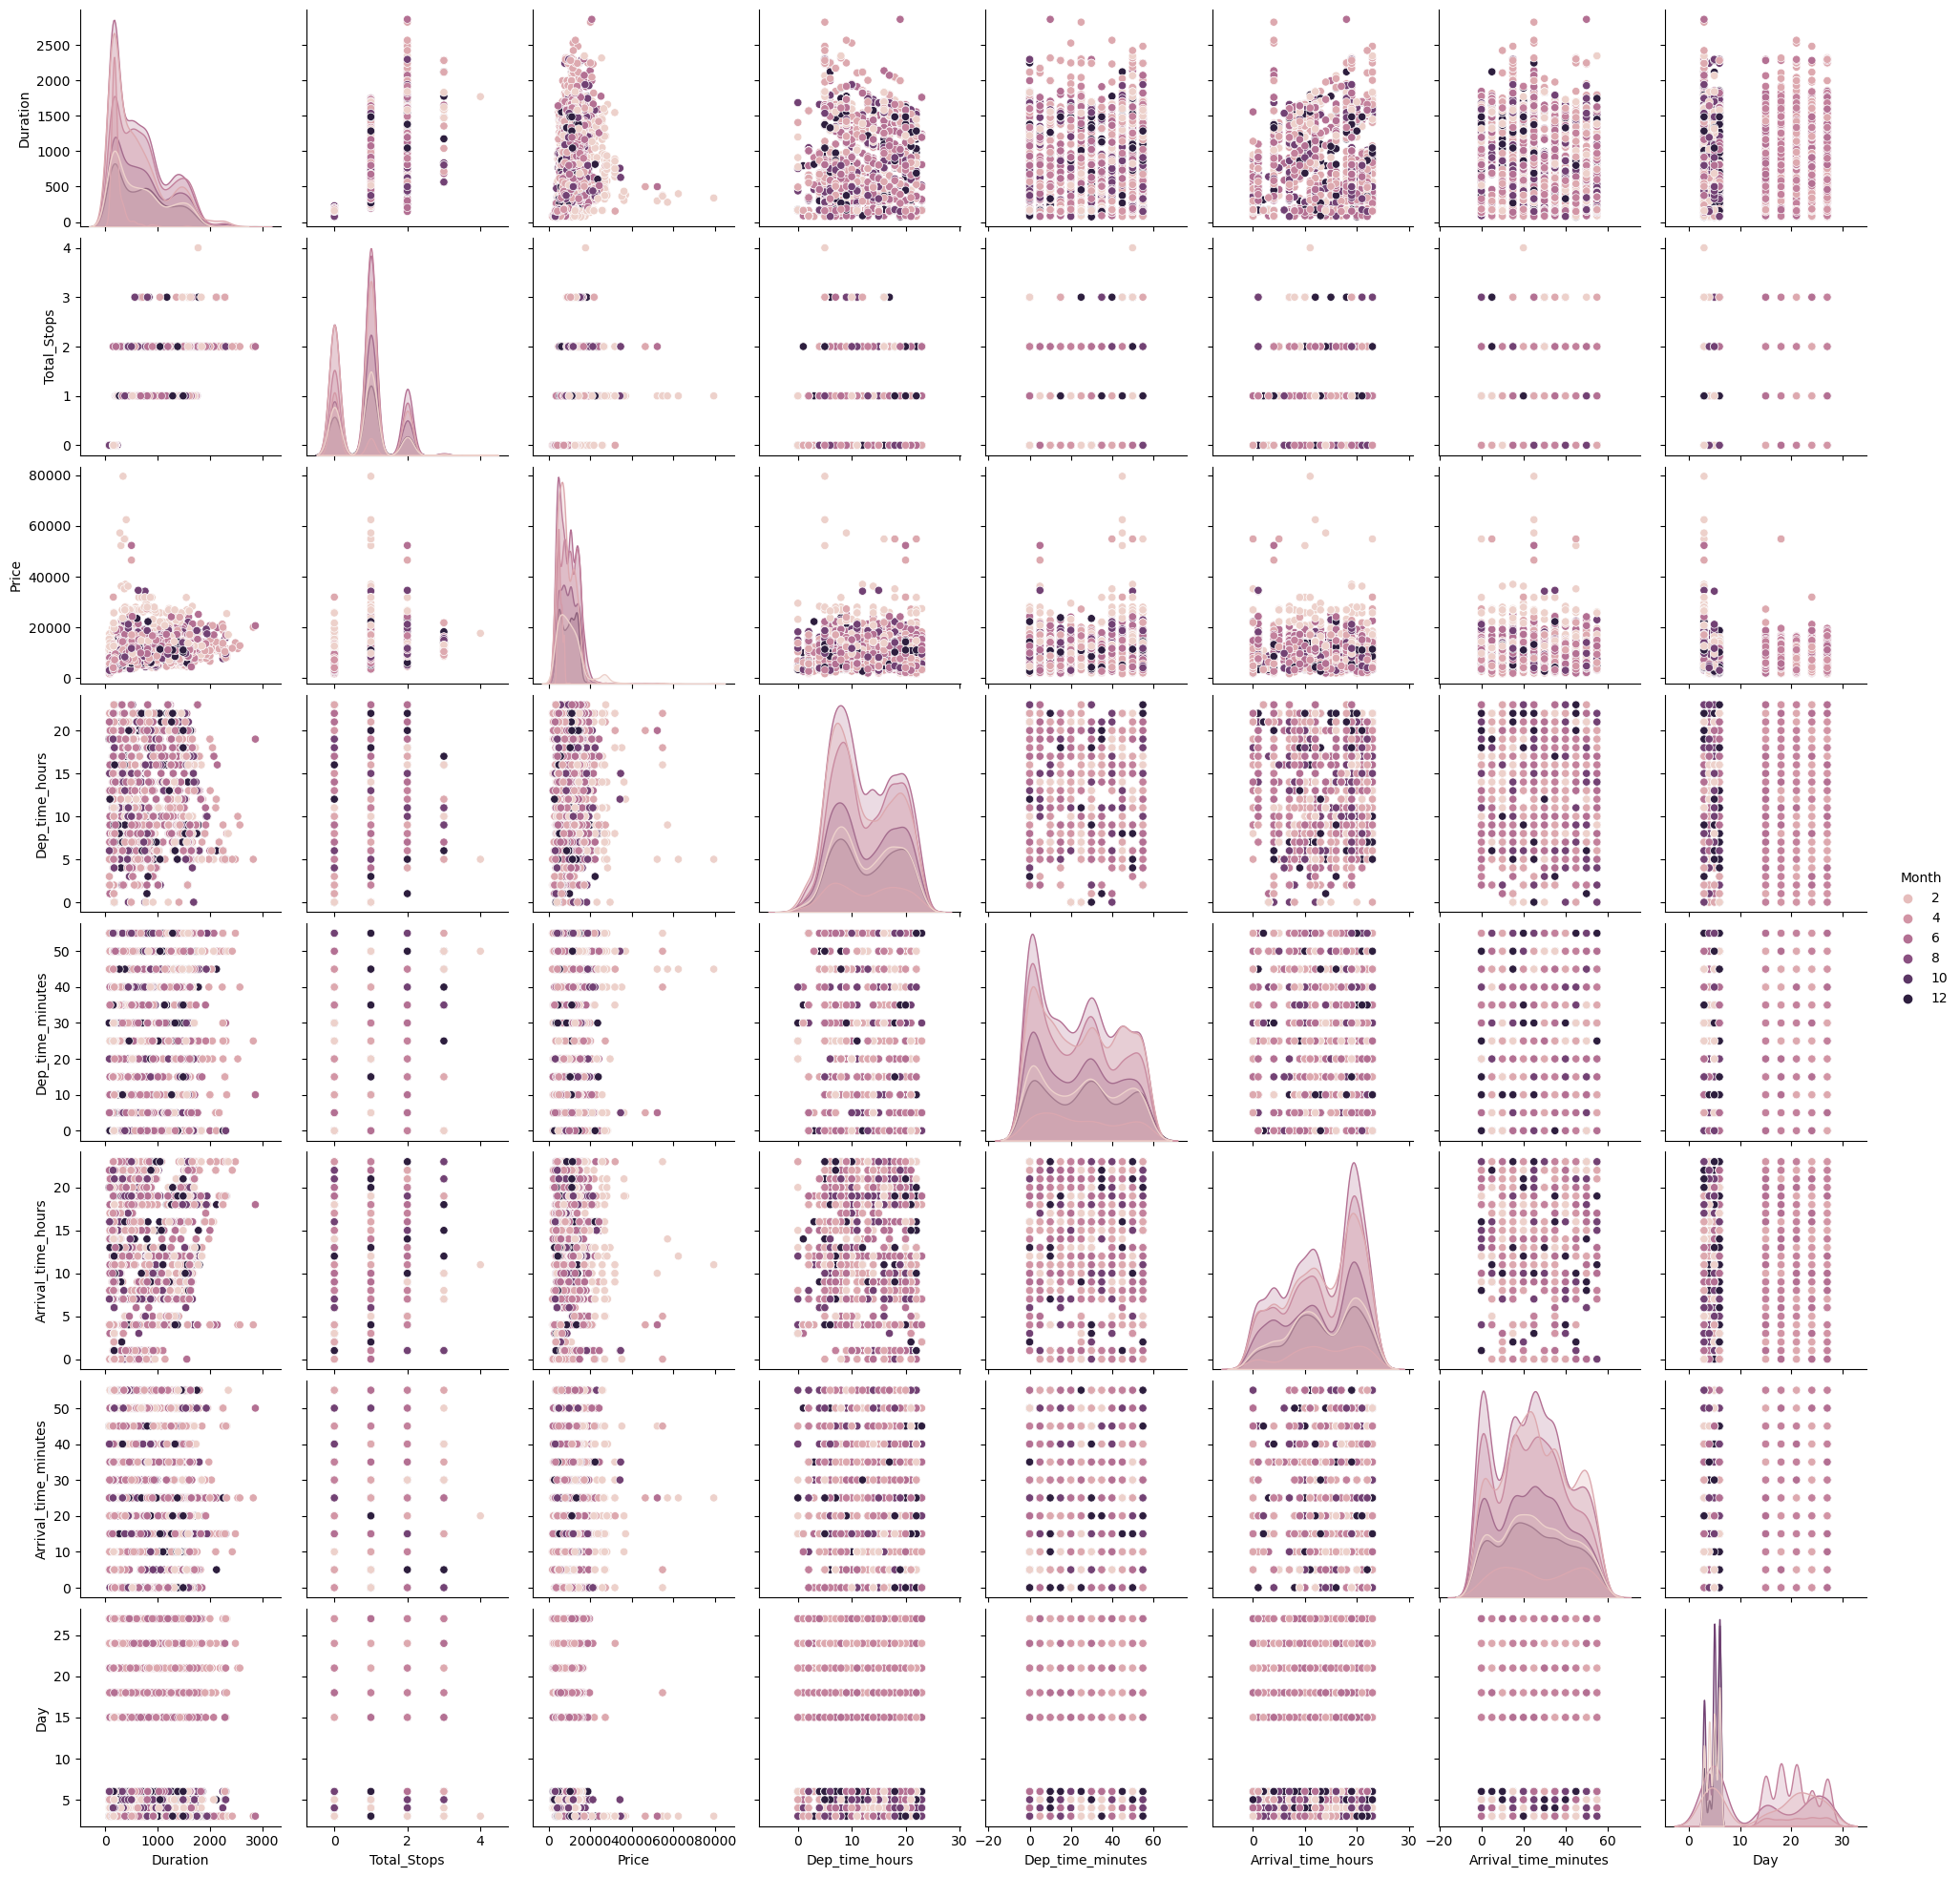

In [24]:
sns.pairplot(data, hue = 'Month')
plt.show()

### Airline

In [43]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

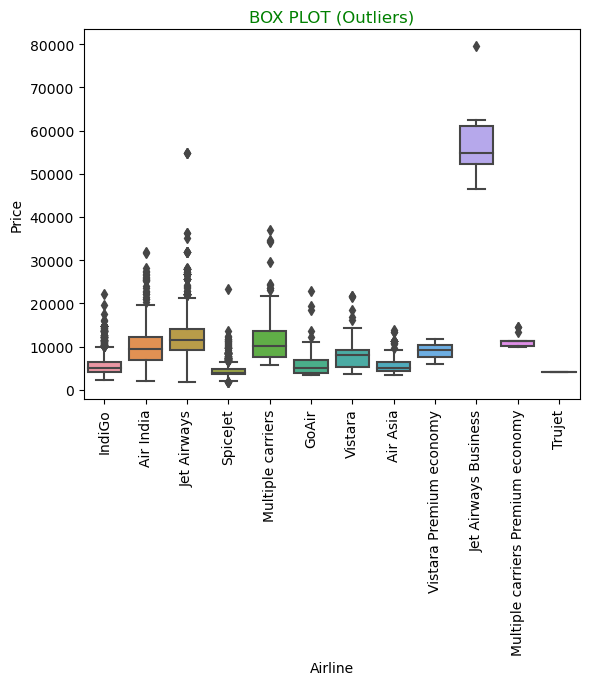

In [44]:

sns.boxplot(x= 'Airline',y='Price',data = data)
plt.xticks(rotation=90)
plt.title('BOX PLOT (Outliers)',color = 'Green')
plt.show()

In [45]:
Airline_dummies = pd.get_dummies(data['Airline'],drop_first=True)


In [46]:
Airline_dummies.head(2)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [47]:
data = pd.concat([data,Airline_dummies],axis = 1)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR ? DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# dropping Airline column
data.drop(['Airline'], axis = 1,inplace = True)
data.head(2)

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR ? DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0


In [49]:
secon = ['Source','Destination']
data = pd.get_dummies(data= data, columns = secon, drop_first = True)
data.head(2)

,Route,Duration,Total_Stops,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR ? DEL,170,0,3897,22,20,1,10,3,24,...,0,0,0,0,0,0,0,0,0,1
1,CCU ? IXR ? BBI ? BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0


### Route

In [50]:
Route = data[['Route']]
Route.head(2)

,Route
0,BLR ? DEL
1,CCU ? IXR ? BBI ? BLR


In [51]:
Route['Route_1'] = Route['Route'].str.split('?').str[0]
Route['Route_2'] = Route['Route'].str.split('?').str[1]
Route['Route_3'] = Route['Route'].str.split('?').str[2]
Route['Route_4'] = Route['Route'].str.split('?').str[3]
Route['Route_5'] = Route['Route'].str.split('?').str[4]
Route.head(2)

C:\Users\spand\AppData\Local\Temp\ipykernel_16460\2524954335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route['Route_1'] = Route['Route'].str.split('?').str[0]
C:\Users\spand\AppData\Local\Temp\ipykernel_16460\2524954335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route['Route_2'] = Route['Route'].str.split('?').str[1]
C:\Users\spand\AppData\Local\Temp\ipykernel_16460\2524954335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR ? DEL,BLR,DEL,NaN,NaN,NaN
1,CCU ? IXR ? BBI ? BLR,CCU,IXR,BBI,BLR,NaN


In [52]:
Route.fillna('None',inplace = True)
Route.head(2)

C:\Users\spand\AppData\Local\Temp\ipykernel_16460\969926652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route.fillna('None',inplace = True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR ? DEL,BLR,DEL,None,None,None
1,CCU ? IXR ? BBI ? BLR,CCU,IXR,BBI,BLR,None


In [53]:
# applying Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(1,6):
    col = 'Route_' +str(i)
    Route[col] = le.fit_transform(Route[col])

Route.head(2)    

C:\Users\spand\AppData\Local\Temp\ipykernel_16460\2081150232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route[col] = le.fit_transform(Route[col])


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR ? DEL,0,13,29,13,5
1,CCU ? IXR ? BBI ? BLR,2,25,1,3,5


In [54]:
Route.drop('Route',inplace = True, axis=1)
Route.head(2)

C:\Users\spand\AppData\Local\Temp\ipykernel_16460\1039400144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Route.drop('Route',inplace = True, axis=1)


,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5


In [55]:
data = pd.concat([data,Route],axis= 1)
data.head(2)

,Route,Duration,Total_Stops,Price,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR ? DEL,170,0,3897,22,20,1,10,3,24,...,0,0,0,0,1,0,13,29,13,5
1,CCU ? IXR ? BBI ? BLR,445,2,7662,5,50,13,15,1,5,...,0,0,0,0,0,2,25,1,3,5


In [60]:
data.drop('Route',axis=1 ,inplace=True)

KeyError: "['Route'] not found in axis"

In [62]:
column = data.columns.to_list()
new_columns = column[:2]+ column[3:]
new_columns.append(column[2])
data = data.reindex(columns= new_columns)
data.head()

,Duration,Total_Stops,Dep_time_hours,Dep_time_minutes,Arrival_time_hours,Arrival_time_minutes,Month,Day,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,3,24,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,1,5,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,9,6,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,12,5,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,1,3,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

In [67]:
X = data[:,:-1]
y = data[:,1]

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 10)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 33)
(2671, 33)
(8011,)
(2671,)


In [80]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, min_samples_split=3)
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [82]:
pd = model.predict(x_test)

In [93]:
import numpy as np
from sklearn.metrics import mean_squared_error
def m(y_test,pd):
    print('rmsc', mean_squared_error(y_test,pd)**0.5)
    print('r2',r2_score(y_test,pd))
    
def a(y_test,pd):
    error = abs(y_test - pd)
    mapping = 100*np.mean(error/pd)
    accuracy =100- mapping
    return accuracy


In [94]:
m(y_test,pd)

rmsc 0.003825054065307982
r2 0.9999852373531151


In [95]:
a(y_test,pd)

99.99735740563868